# Task 2

<div class="alert alert-block alert-danger">

# FIT5196 Task 2 in Assessment 2
    
#### Student Name: Quoc Khoa Tran
#### Student ID: 34124888
#### Student Name: Minh Tuan Bui
#### Student ID: 33448922

Date: 23/05/2024

Environment: Google Colab

Libraries used:
* numpy 1.21.0 (for numerical operations, installed and imported)
* pandas 1.3.0 (for dataframe operations, installed and imported)
* scipy 1.7.0 (for scientific and statistical functions, installed and imported)
* matplotlib 3.4.2 (for plotting and visualization, installed and imported)
* seaborn 0.11.1 (for statistical data visualization, installed and imported)
* scikit-learn 0.24.2 (for machine learning algorithms and preprocessing, installed and imported)
* sklearn.model_selection (for model selection utilities, included in scikit-learn package)
* sklearn.linear_model (for linear regression models, included in scikit-learn package)
* sklearn.metrics (for evaluation metrics, included in scikit-learn package)

    </div>

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[ Importing Libraries](#libs) <br>
[I. Data Loading](#load) <br>
[II. Data Preprocessing](#prepro) <br>
[III. Exploratory Data Analysis](#xplore) <br>
$\;\;\;\;$[3.1. Descriptive Statistics](#stats) <br>
$\;\;\;\;$[3.2. Distribution](#dist) <br>
$\;\;\;\;$[3.3. Sknewness](#skew) <br>
$\;\;\;\;$[3.4. Correlation Analysis](#corrl) <br>
[IV. Transformation & Normalization](#trans&norm) <br>
$\;\;\;\;$[4.1. Transformation](#trans) <br>
$\;\;\;\;$[4.2. Normalization](#norm) <br>
[V. Conclusion](#conclu) <br>
[References](#Ref) <br>

<div class="alert alert-block alert-success">
    
## Import the needed libraries  <a class="anchor" name="libs"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm, boxcox, pearsonr, shapiro, boxcox, yeojohnson
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

<div class="alert alert-block alert-success">
    
## **I. Data Loading**  <a class="anchor" name="load"></a>


We start by loading the suburban dataset, which contains various features including the number of houses, number of units, median income, and median house price.

In [3]:
# suburb_data = pd.read_excel("/content/drive/Shareddrives/FIT5196_S1_2024/A2/supplementary_data/suburb_info.xlsx")
# suburb_data.head(5)

In [4]:
# Load the datasets
suburb_data = pd.read_excel("suburb_info.xlsx")


suburb_data.info()
suburb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   suburb              202 non-null    object
 1   number_of_houses    202 non-null    int64 
 2   number_of_units     202 non-null    int64 
 3   municipality        202 non-null    object
 4   aus_born_perc       202 non-null    object
 5   median_income       202 non-null    object
 6   median_house_price  202 non-null    object
 7   population          202 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.8+ KB


,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68%,"$1,797","$1,299,400",4025
1,ABERFELDIE,1410,453,Moonee Valley,81%,"$1,571","$1,926,600",22442
2,ALBANVALE,1897,138,Brimbank,46%,$907,"$594,200",54005
3,ALBION,1389,1392,Brimbank,52%,$929,"$739,100",30677
4,ALPHINGTON,1729,1099,Darebin,73%,"$1,538","$1,729,600",9227


From data observation, we have no null value which need to be processed. The columns aus_born_perc, median_income, and median_house_price are stored as strings with special characters (%, $, ,). The suburb and municipality columns are categorical and stored as strings. The median_income and median_house_price columns contain dollar signs and commas, which need to be removed for numerical analysis. The aus_born_perc column contains percent signs, which need to be removed and converted to a proportion for numerical analysis. The median_income, median_house_price, and aus_born_perc columns are stored as objects (strings), but they should be converted to numerical types (float) after cleaning.

<div class="alert alert-block alert-success">
    
## **II. Data Preprocessing**  <a class="anchor" name="prepro"></a>

The data preprocessing step is crucial for preparing the raw data for further analysis. In this phase, we clean and transform the data to ensure it is in a suitable format for exploratory data analysis (EDA) and subsequent transformations. Specifically, we address any inconsistencies, convert data types, and handle any special characters that may interfere with numerical operations.

In [5]:
# Remove the trailing '%' sign from the 'aus_born_perc' column, convert the cleaned strings to float, and then divide by 100 to convert percentage to proportion
suburb_data['aus_born_perc'] = suburb_data['aus_born_perc'].str.rstrip('%').astype('float') / 100

# Remove the leading '$' sign from the 'median_income' column
suburb_data['median_income'] = suburb_data['median_income'].str.lstrip('$')
# Remove commas from the 'median_income' column, then convert the cleaned strings to float
suburb_data['median_income'] = suburb_data['median_income'].str.replace(',', '').astype('float')

# Remove the leading '$' sign from the 'median_house_price' column
suburb_data['median_house_price'] = suburb_data['median_house_price'].str.lstrip('$')
# Remove commas from the 'median_house_price' column, then convert the cleaned strings to float
suburb_data['median_house_price'] = suburb_data['median_house_price'].str.replace(',', '').astype('float')

suburb_data.head(5)

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,0.68,1797.0,1299400.0,4025
1,ABERFELDIE,1410,453,Moonee Valley,0.81,1571.0,1926600.0,22442
2,ALBANVALE,1897,138,Brimbank,0.46,907.0,594200.0,54005
3,ALBION,1389,1392,Brimbank,0.52,929.0,739100.0,30677
4,ALPHINGTON,1729,1099,Darebin,0.73,1538.0,1729600.0,9227


In [6]:
print(suburb_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suburb              202 non-null    object 
 1   number_of_houses    202 non-null    int64  
 2   number_of_units     202 non-null    int64  
 3   municipality        202 non-null    object 
 4   aus_born_perc       202 non-null    float64
 5   median_income       202 non-null    float64
 6   median_house_price  202 non-null    float64
 7   population          202 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 12.8+ KB
None


#### Explanation;

-  Removes % from aus_born_perc and converts the values to proportions, facilitating numerical operations.

- Cleaning median_income and median_house_price by remove dollar signs and commas, converting the columns to floats to allow numerical analysis.

#### Observation:

The preprocessing steps are successful as all the special character has been removed and the data type of numerical column has been changed to appropriate type

<div class="alert alert-block alert-success">
    
## **III. Exploratory Data Analysis**  <a class="anchor" name="xplore"></a>

Exploratory Data Analysis (EDA) is a critical step in understanding the underlying structure and patterns within a dataset. This process involves summarizing the main characteristics of the data, often using visual methods. Through EDA, we can identify relationships between variables, detect anomalies or outliers, and uncover insights that guide further analysis and preprocessing steps.

In this phase, we will perform the following:

1. Descriptive Statistics: Summarize the central tendency, dispersion, and shape of the dataset’s distribution.
2. Distribution Analysis: Visualize the distribution of key variables to understand their spread and skewness.
3. Skewness Analysis: Assess the skewness of the variables to determine if transformations are needed to achieve normality.
4. Correlation Analysis: Examine the relationships between the predictor variables and the target variable (median_house_price).

<div class="alert alert-block alert-info">
    
### **3.1 Descriptive Statistics**  <a class="anchor" name="stats"></a>

In [7]:
# Summary statistics
print(suburb_data.describe())

       number_of_houses  number_of_units  aus_born_perc  median_income  \
count        202.000000       202.000000     202.000000     202.000000   
mean        4155.767327      2480.410891       0.683663    1387.935644   
std         3400.864988      3132.684712       0.107613     317.841321   
min          283.000000        60.000000       0.360000     633.000000   
25%         1973.500000       620.500000       0.620000    1182.250000   
50%         3256.500000      1603.000000       0.700000    1393.000000   
75%         5518.500000      3089.000000       0.770000    1560.000000   
max        23338.000000     24380.000000       0.880000    2352.000000   

       median_house_price    population  
count        2.020000e+02    202.000000  
mean         1.218817e+06  18659.311881  
std          4.716807e+05   9604.187282  
min          5.072000e+05    170.000000  
25%          8.706750e+05  12063.000000  
50%          1.134500e+06  17583.000000  
75%          1.467550e+06  24045.000000


The descriptive statistics of the suburban dataset reveal significant variability across several key features, highlighting the diversity of the suburbs. 

- The number of houses and units varies widely, with some suburbs having very few units and others having a substantial number, indicating varying sizes and housing densities. 
- The Australian-born percentage shows that most suburbs have a high proportion of Australian-born residents, but there is still some diversity. 
- The median income and median house price also show considerable variability, with some suburbs having significantly higher incomes and house prices than others. 
- The population figures further emphasize this diversity, ranging from sparsely populated to highly dense areas. 

These variations underscore the importance of using appropriate normalization techniques to ensure accurate and meaningful analysis in subsequent modeling steps.

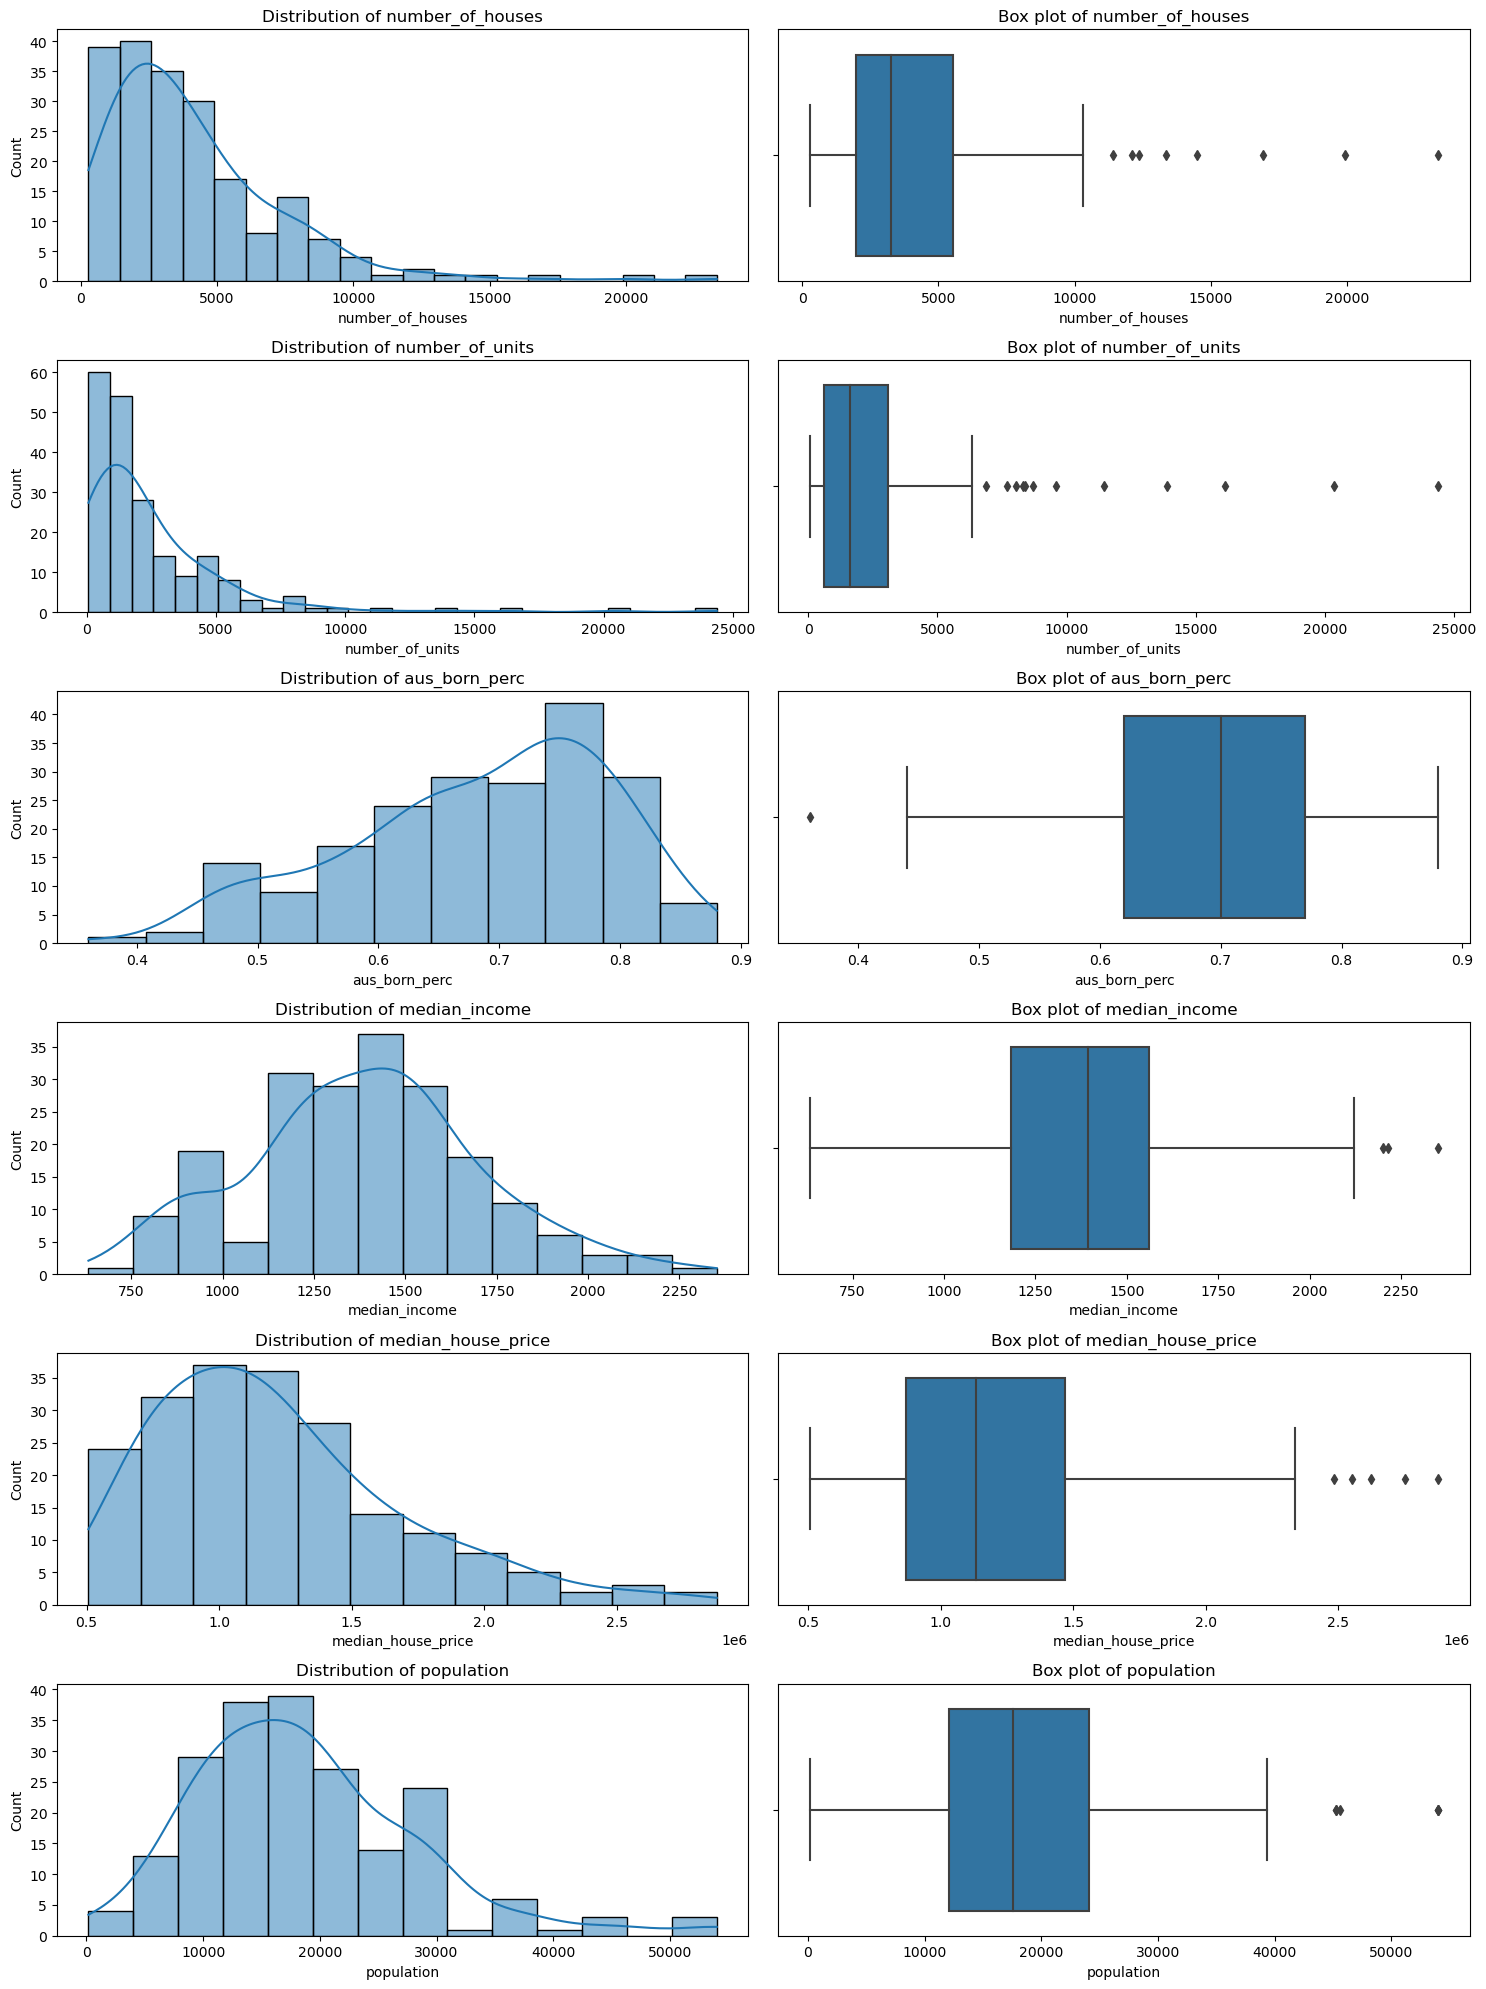

In [8]:
# Features to visualize
features = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'median_house_price', 'population']

# Plot histograms and box plots
plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(6, 2, 2*i-1)
    sns.histplot(suburb_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    plt.subplot(6, 2, 2*i)
    sns.boxplot(x=suburb_data[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

#### Explanation:

we analyze the distribution of key features in the suburban dataset using histograms and box plots. The aim is to understand the spread, central tendency, and presence of outliers in the data.

- For each feature, we create two subplots:

1. Histogram with KDE: The first subplot (2*i-1) shows the histogram and Kernel Density Estimate (KDE) of the feature, which helps visualize the distribution and the density of the data points.
2. Box plot: The second subplot (2*i) shows the box plot of the feature, which highlights the median, quartiles, and potential outliers in the data.

#### Observation:

- Number of houses:
    - Distribution: The distribution is positively skewed, indicating that most suburbs have a relatively low number of houses, with a few having a significantly higher number.
    - Box plot: Shows several outliers on the higher end, confirming the presence of suburbs with a much larger number of houses compared to the median.
    
- Number of units:
    - Distribution: Also positively skewed, with most suburbs having fewer units and a few having many more.
    - Box plot: Highlights outliers, indicating some suburbs have significantly more units than the rest.

- Australian-born percentage:
    - Distribution: Approximately normal distribution, centered around 0.7.
    - Box plot: A relatively symmetric distribution with few outliers, indicating most suburbs have a high proportion of Australian-born residents.

- Median income:
    - Distribution: Slightly right-skewed, with most suburbs having a median income around the mean but a few suburbs having much higher incomes.
    - Box plot: Shows outliers on the higher end, indicating some suburbs have significantly higher median incomes.

- Median house price:
    - Distribution: Right-skewed distribution, indicating that while many suburbs have median house prices around the mean, some have much higher prices.
    - Box plot: Confirms the presence of outliers with much higher median house prices.

- Population:
    - Distribution: Approximately normal distribution, indicating a balance between sparsely and densely populated suburbs.
    - Box plot: Highlights a few outliers, suggesting some suburbs have a significantly higher population compared to the majority.
    
Overall, the data's skewness indicates the potential need for normalization to improve the accuracy and performance of any subsequent predictive models or statistical analyses

<div class="alert alert-block alert-info">
    
### **3.2 Data Distribution**  <a class="anchor" name="dist"></a>

To gain a deeper understanding of the data distribution, we use violin plots. Violin plots combine aspects of box plots and kernel density plots, providing a comprehensive visualization of the data's distribution, central tendency, and variability. These plots help us identify the shape of the distribution, detect outliers, and understand the spread of each feature.

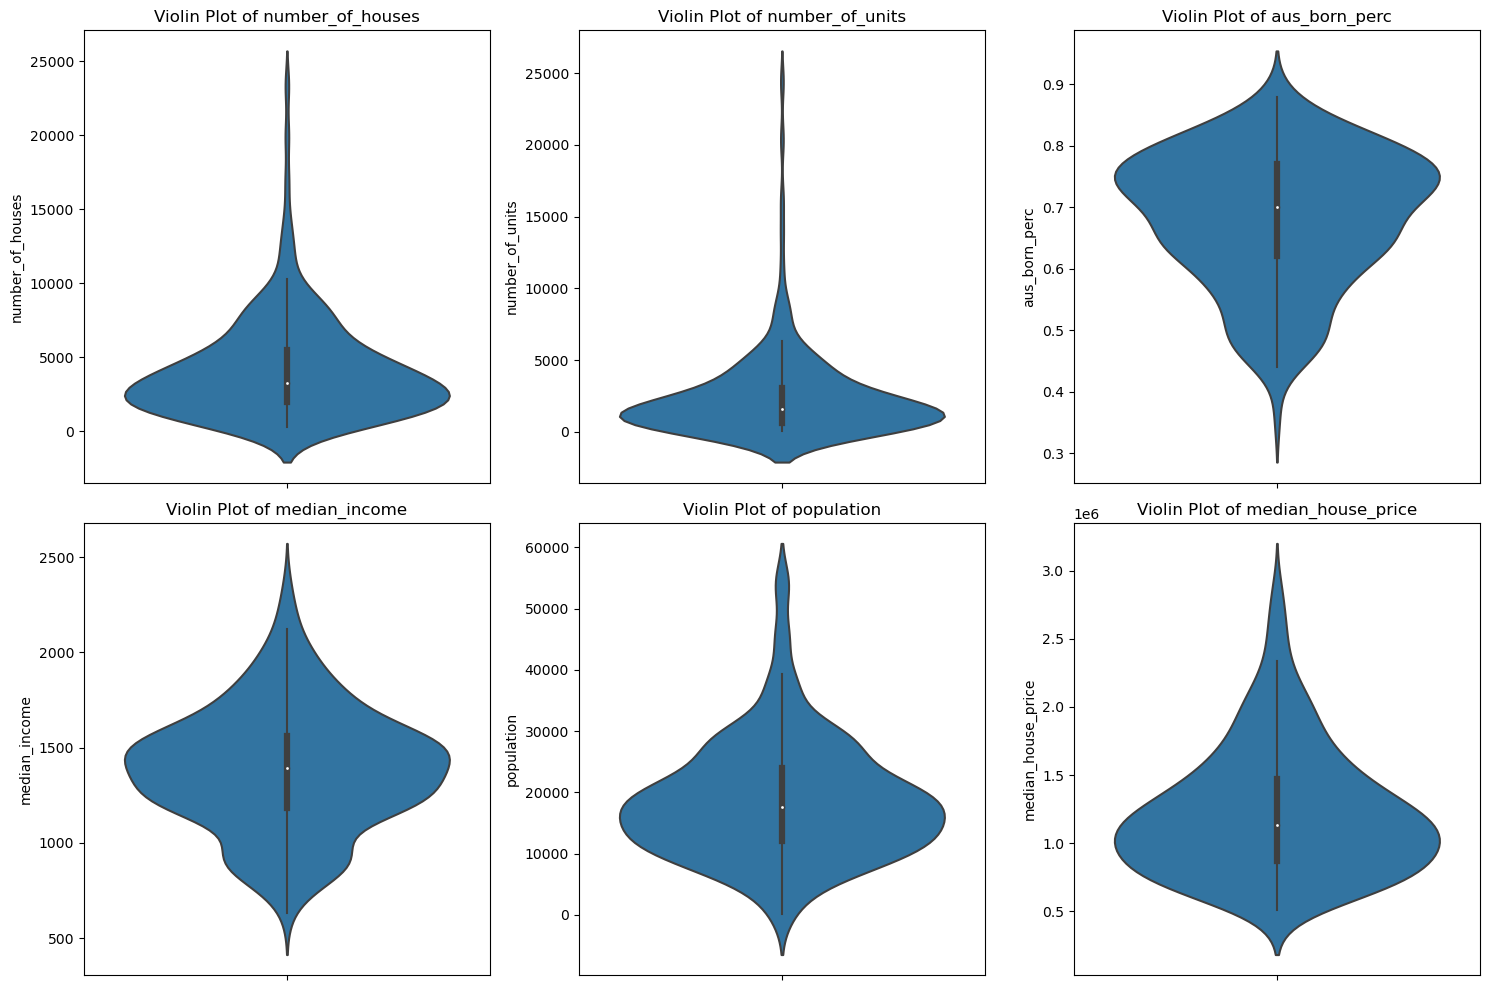

In [9]:
# Define the list of features to visualize
suburb_features = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'population', 'median_house_price']

# Initialize the figure with a specified size
plt.figure(figsize=(15, 10))

# Loop through the list of features to create subplots for each
for i, feature in enumerate(suburb_features):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
    sns.violinplot(y=suburb_data[feature])  # Generate a violin plot for the current feature
    plt.title(f'Violin Plot of {feature}')  # Set the title for the subplot

# Adjust the layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

#### Explanation:

For each feature, we create a subplot:

1. Subplot creation: plt.subplot(2, 3, i+1) creates a 2x3 grid of subplots. The i+1 ensures each feature gets its unique position in the grid.
2. Generate violin plot: sns.violinplot(y=suburb_data[feature]) generates a violin plot for the current feature. The violin plot shows the distribution of the data across several levels, combining box plot and density trace.
3. Set subplot title: plt.title(f'Violin Plot of {feature}') sets an appropriate title for each subplot.

#### Observation:

1. The number_of_houses feature exhibits a right-skewed distribution, with a high concentration of suburbs having a lower number of houses and a long tail extending towards higher values. This indicates that while most suburbs have a modest number of houses, there are a few with significantly more, skewing the distribution to the right. The box plot within the violin confirms this skewness, showing the median towards the lower end and a wide interquartile range (IQR).

2. Similarly, the number_of_units feature also displays a right-skewed distribution, with most suburbs having fewer units and a long tail towards higher numbers. The median and IQR are concentrated towards the lower values, reflecting the dense clustering of data points in the lower range. This pattern is consistent with the distribution of houses, suggesting a similar spread in the number of units across suburbs.

3. The aus_born_perc feature shows a slightly left-skewed distribution. There is a higher density of suburbs with a percentage of Australian-born residents around 0.7, and fewer suburbs have very low or very high percentages. The median is relatively central, and the spread appears more balanced compared to the highly skewed distributions of houses and units.

4. The median_income distribution is approximately normal but exhibits slight multimodal characteristics, with distinct peaks indicating common income ranges. The median is central, and the IQR indicates a balanced distribution around the median, although the slight peaks suggest some income stratification among suburbs. This balanced distribution contrasts with the skewed distributions seen in other features.

5. The median_house_price feature is right-skewed, with most suburbs having lower median house prices and a long tail indicating a few suburbs with very high prices. The median and IQR are concentrated towards the lower values, consistent with the right skew, suggesting a significant variation in house prices across suburbs.

6. Finally, the population distribution is also right-skewed, with most suburbs having lower populations and a few with significantly higher populations. The median and IQR are situated towards the lower end, confirming the skewness observed in other features related to quantity and scale.

<div class="alert alert-block alert-info">
    
### **3.3 Skewness**  <a class="anchor" name="skew"></a>

Skewness is a measure of the asymmetry of the distribution of values in a dataset. It helps us understand the extent to which data deviates from a normal distribution. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution. A skewness close to zero suggests an approximately normal distribution.

In [10]:
# List of features to check skewness
suburb_features = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'median_house_price', 'population']

# Calculate and print skewness for each feature
for feature in suburb_features:
    feature_skewness = skew(suburb_data[feature])

   # Determine skewness type
    if feature_skewness > 0.5:
        skewness_type = "Right Skew"
    elif feature_skewness < -0.5:
        skewness_type = "Left Skew"
    else:
        skewness_type = "Approximately Normal"

    print(f'Skewness of {feature}: {feature_skewness:.2f} ({skewness_type})')

Skewness of number_of_houses: 2.14 (Right Skew)
Skewness of number_of_units: 3.60 (Right Skew)
Skewness of aus_born_perc: -0.56 (Left Skew)
Skewness of median_income: 0.17 (Approximately Normal)
Skewness of median_house_price: 1.03 (Right Skew)
Skewness of population: 1.08 (Right Skew)


To verify the skewness in the violin plot observation, we will use `skew` function from `scipy.stats` to check the skewness of the dataset. The result as shown in the table below confirms our observation in the plots

##### Skewness of Columns
| Column Name           | Skewness             | Direction   |
|-----------------------|----------------------|-------------|
| number_of_houses      | 2.14    | Right Skew  |
| number_of_units       | 3.60   | Right Skew  |
| aus_born_perc         | -0.56  | Left Skew   |
| median_income         | 0.17  | Approximately Normal  |
| median_house_price    | 1.02   | Right Skew  |
| population            | 1.07   | Right Skew  |


#### Justification:

Number of Houses:
- The distribution is positively skewed, indicating that most suburbs have a relatively low number of houses, with a few having significantly higher numbers. This suggests that a transformation may be needed to normalize the distribution.

Number of Units:
- The distribution is highly positively skewed, indicating a similar pattern to the number of houses. A transformation would help achieve a more normal distribution.

Australian-born Percentage (aus_born_perc):
- The distribution is slightly negatively skewed, indicating that most suburbs have a high proportion of Australian-born residents. This skewness is not severe, but a transformation might still be considered.

Median Income:
- The distribution is close to normal, suggesting that no significant transformation is needed for this feature.

Median House Price:
- The distribution is positively skewed, with most suburbs having house prices around the mean, but some having much higher prices. A transformation may help in normalizing this feature.

Population:
- The distribution is positively skewed, indicating a need for transformation to achieve a more normal distribution.

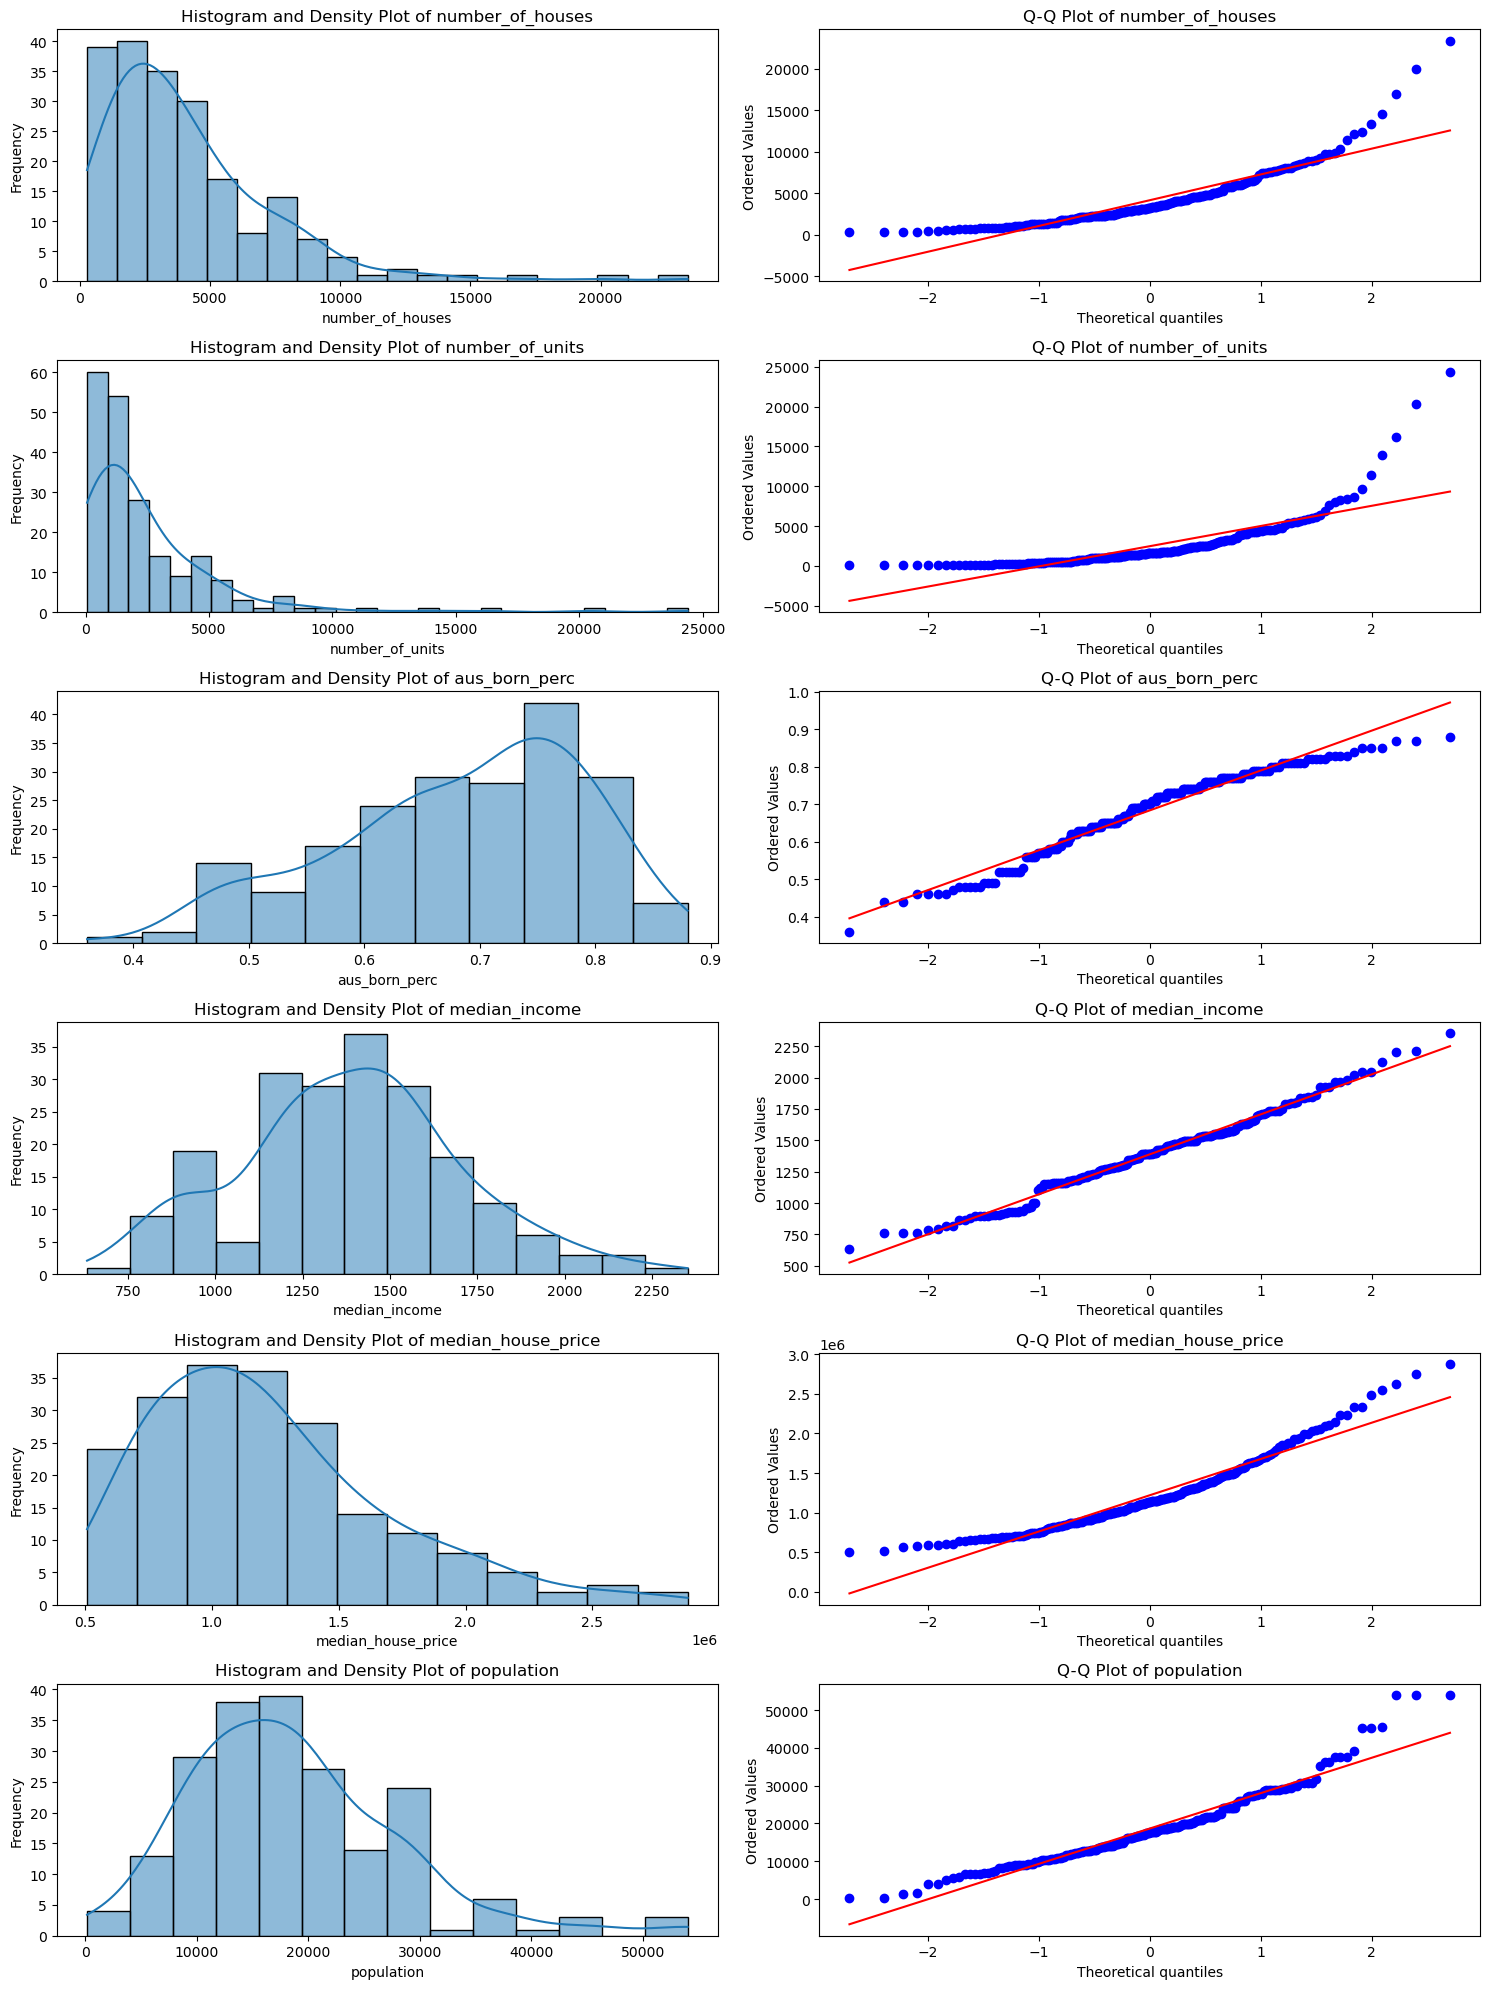

In [11]:
import scipy.stats as stats

# List of features to visualize
suburb_features = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'median_house_price', 'population']

# Initialize the figure with a specified size
plt.figure(figsize=(15, 20))

# Loop through the list of features to create subplots for each
for i, feature in enumerate(suburb_features):
    # Histogram with KDE
    plt.subplot(6, 2, 2*i+1)
    sns.histplot(suburb_data[feature], kde=True)
    plt.title(f'Histogram and Density Plot of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    
    # Q-Q Plot
    plt.subplot(6, 2, 2*i+2)
    stats.probplot(suburb_data[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')

# Adjust the layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

#### Explanation:

- Histograms with KDE: These plots show the frequency distribution of each feature, along with a kernel density estimate (KDE) to visualize the distribution shape.
- Q-Q (Quantile-Quantile)  Plots: These plots compare the distribution of each feature to a normal distribution. If the data points lie on the diagonal line, the distribution is approximately normal. Deviations from this line indicate skewness.

#### Observation:

1. Number of houses:
- Histogram: Positively skewed distribution with a long tail on the higher end.
- Q-Q Plot: Points deviate from the straight line, especially in the upper quantiles, indicating positive skewness.

2. Number of units:
- Histogram: Also positively skewed, with most values concentrated on the lower end.
- Q-Q Plot: Significant deviation from the line in the upper quantiles, confirming positive skewness.

3. Australian-born percentage:
- Histogram: Approximately normal distribution with a slight skew.
- Q-Q Plot: Points follow the line fairly well with minor deviations, indicating a near-normal distribution.

4. Median income:
- Histogram: Slightly right-skewed distribution.
- Q-Q Plot: Deviations in the upper quantiles, confirming moderate skewness.

5. Median house price:
- Histogram: Right-skewed distribution with a longer tail on the higher end.
- Q-Q Plot: Clear deviation from the line in the upper quantiles, indicating significant skewness.

6. Population:
- Histogram: Approximately normal distribution with some skew.
- Q-Q Plot: Points follow the line fairly well with some deviation in the tails, suggesting near-normal distribution with mild skewness.

These visualizations provide a comprehensive understanding of the skewness in each feature. Histograms with KDE give a visual representation of the data distribution, while Q-Q plots help assess how closely the data follows a normal distribution. Identifying skewness is crucial for choosing the appropriate transformations and statistical tests in further analysis.

<div class="alert alert-block alert-info">
    
### **3.4 Correlation Analysis**  <a class="anchor" name="corrl"></a>


Correlation analysis is an essential step in understanding the relationships between variables in the dataset. By examining correlations, we can identify which features are most strongly associated with our target variable, median_house_price, and determine multicollinearity among predictor variables. This analysis helps in feature selection and engineering, ensuring that the predictive model is both accurate and interpretable.

To perform correlation analysis, we use two main visualizations:

1. Regression Plots: These plots show the relationship between each predictor variable and the target variable, median_house_price. By fitting a regression line to the scatter plots, we can visualize the strength and direction of these relationships.
2. Correlation Matrix Heatmap: This heatmap provides a comprehensive view of the pairwise correlations between all numerical variables in the dataset. The color intensity and annotations indicate the strength and direction of the correlations, making it easier to identify significant relationships and potential multicollinearity issues.

These visualizations help us to assess the linearity and strength of relationships between variables, guiding the next steps in data preprocessing and modeling.

##### 1. Regression plot

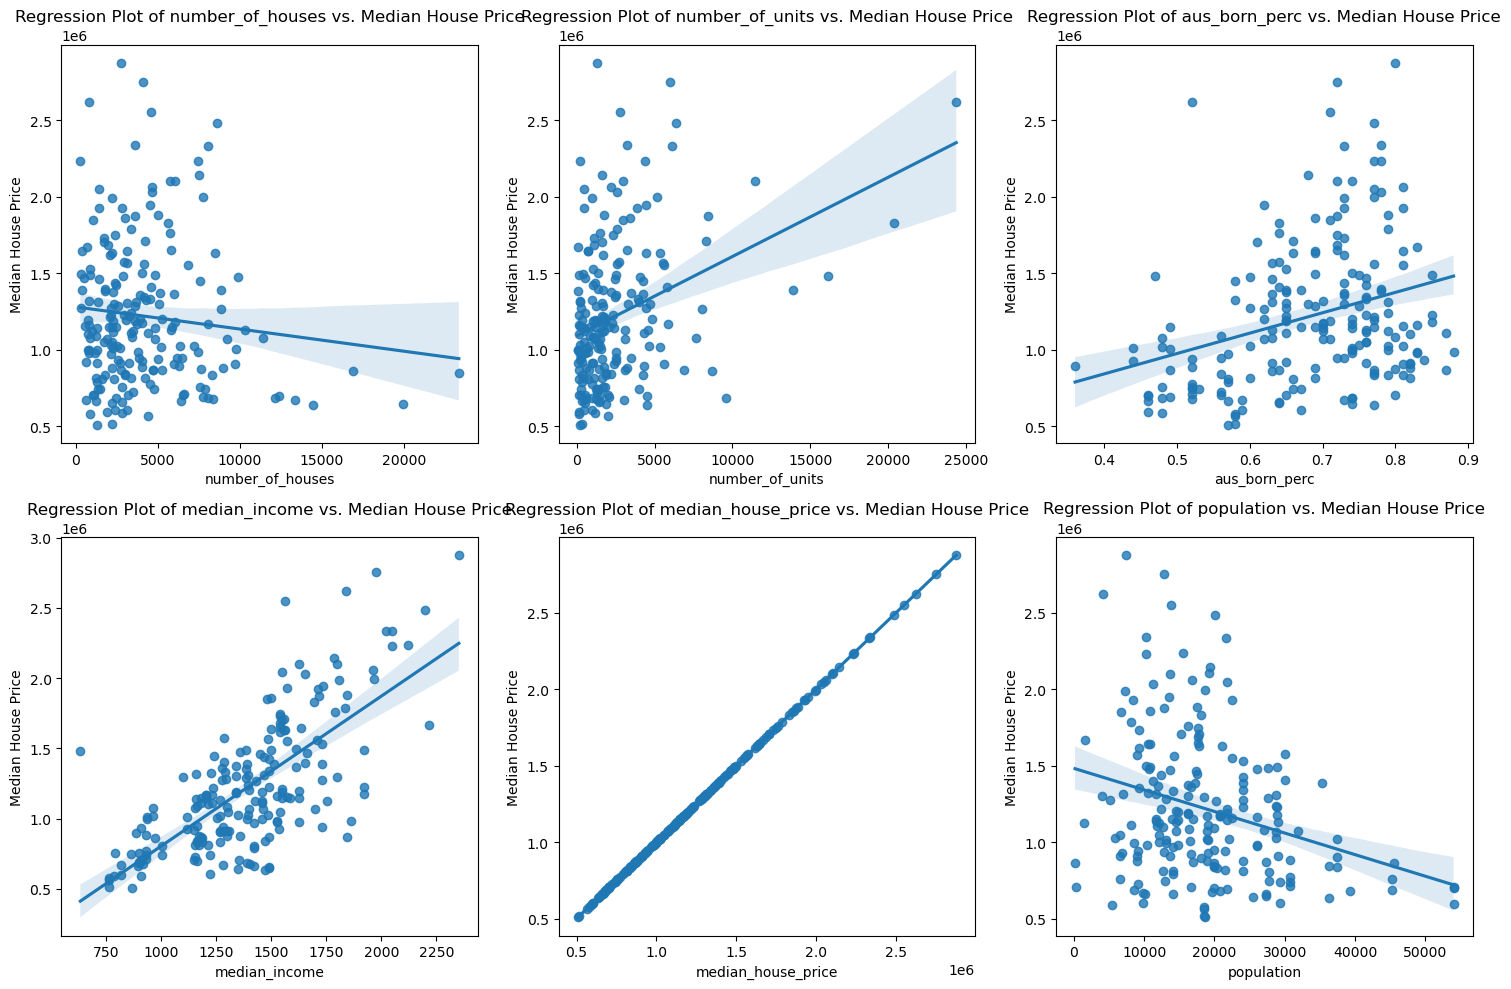

In [12]:
# Initialize the figure with a specified size
plt.figure(figsize=(15, 10))

# Loop through the list of features to create subplots for each
for i, feature in enumerate(suburb_features):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
    sns.regplot(x=suburb_data[feature], y=suburb_data['median_house_price'])  # Generate a regression plot for the current feature against median house price
    plt.title(f'Regression Plot of {feature} vs. Median House Price')  # Set the title for the subplot
    plt.xlabel(feature)  # Set the x-axis label
    plt.ylabel('Median House Price')  # Set the y-axis label

# Adjust the layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

#### Explanation:

Loop through the features: For each feature, we create a subplot:

- Subplot creation: plt.subplot(2, 3, i+1) creates a 2x3 grid of subplots. The i+1 ensures each feature gets its unique position in the grid.
- Generate regression plot: sns.regplot(x=suburb_data[feature], y=suburb_data['median_house_price']) generates a regression plot for the current feature against median_house_price. This plot shows the scatter plot of the data points along with a fitted regression line, helping visualize the linear relationship between the variables.
- Set subplot title and labels: plt.title(f'Regression Plot of {feature} vs. Median House Price') sets an appropriate title for each subplot, and plt.xlabel(feature) and plt.ylabel('Median House Price') set the x and y-axis labels, respectively.

#### Observation:

1. Number of houses vs. Median house price:
- Shows a weak negative correlation. As the number of houses increases, the median house price tends to decrease slightly.

2. Number of units vs. Median house price:
- Shows a positive correlation. As the number of units increases, the median house price tends to increase.

3. Australian-born percentage vs. Median house price:
- Shows a moderate positive correlation. As the percentage of Australian-born residents increases, the median house price tends to increase.

4. Median income vs. Median house price:
- Shows a strong positive correlation. As median income increases, the median house price also increases significantly.

5. Population vs. Median house price:
- Shows a weak negative correlation. As population increases, the median house price tends to decrease slightly.

These regression plots provide valuable insights into the linear relationships between predictor variables and the target variable, guiding further analysis and feature selection for predictive modeling. 

##### 2. Correlation Matrix Heatmap

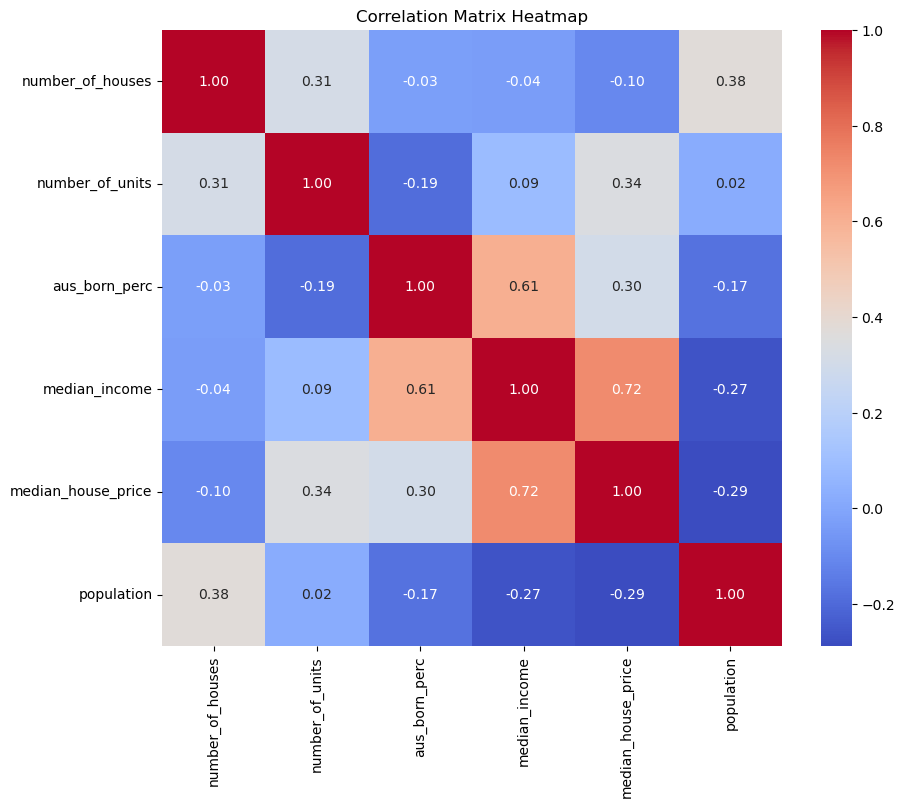

In [13]:
def correlation_plot(df):
  numeric_df = df.select_dtypes(include=['int64', 'float64'])

  # Calculate the correlation matrix
  correlation_matrix = numeric_df.corr()

  # Plot heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix Heatmap')
  plt.show()

correlation_plot(suburb_data)

#### Explanation:

Plot heatmap: We use the seaborn library to create a heatmap of the correlation matrix:

- Figure setup: plt.figure(figsize=(10, 8)) sets up the figure with a size of 10x8 inches.
- Heatmap generation: sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") generates the heatmap with annotations (correlation coefficients) and a color map (coolwarm) to visualize the correlations. The fmt=".2f" ensures the annotations are formatted to two decimal places.

#### Observation:

#### Explanation:

Plot heatmap: We use the seaborn library to create a heatmap of the correlation matrix:

- Figure setup: plt.figure(figsize=(10, 8)) sets up the figure with a size of 10x8 inches.
- Heatmap generation: sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") generates the heatmap with annotations (correlation coefficients) and a color map (coolwarm) to visualize the correlations. The fmt=".2f" ensures the annotations are formatted to two decimal places.

#### Observation:

1. Number of houses:
- Weak negative correlation with median_house_price (-0.10).
- Moderate positive correlation with population (0.38).

2. Number of units:
- Moderate positive correlation with median_house_price (0.34).
- Weak negative correlation with aus_born_perc (-0.19).

3. Australian-born percentage:
- Moderate positive correlation with median_income (0.61).
- Moderate positive correlation with median_house_price (0.30).

4. Median income:
- Strong positive correlation with median_house_price (0.72).
- Moderate positive correlation with aus_born_perc (0.61).

5. Median house price:
- Strong positive correlation with median_income (0.72).
- Moderate positive correlation with number_of_units (0.34).
- Moderate positive correlation with aus_born_perc (0.30).

6. Population:
- Weak negative correlation with median_house_price (-0.29).
- Moderate positive correlation with number_of_houses (0.38).

#### Summary:

From 2 plots, we observe that median_income has the strongest positive correlation with median_house_price (0.72), indicating that income levels are a key predictor of house prices in the suburbs. Number_of_units (0.34) and aus_born_perc (0.30) both show moderate positive correlations with median_house_price, suggesting that these factors are also important but less influential than income. Number_of_houses (-0.10) and population (-0.29) exhibit weak negative correlations with median_house_price, implying that these features are not strong predictors and may slightly lower house prices in more densely populated areas or areas with more houses.

<div class="alert alert-block alert-success">
    
## **IV. Transformation and Normalization**  <a class="anchor" name="trans&norm"></a>

In this assignment, we will first perform transformations followed by normalization. This sequence is essential because post-normalization, some values might become negative, complicating transformations that require non-negative values like logarithmic or square root transformations. Additionally, addressing skewness is a primary goal; transformations are designed to directly target and mitigate skewness, making them the priority.

Normalization does not inherently address skewness; its primary function is to rescale features. Therefore, it is more effective to first apply transformations to correct skewness, ensuring that subsequent normalization operates on data that is more symmetrically distributed. This approach ensures that data preprocessing steps are logical and enhance the quality of our modeling efforts.


<div class="alert alert-block alert-info">
    
### **4.1. Transformation**  <a class="anchor" name="trans"></a>



For the transformation phase, we will explore seven different methods: Logarithmic (log), Square Root (sqrt), Squaring (square), Cubing (cube), Cube Root (root_cube), Reciprocal (reciprocal), and Box-Cox (boxcox). Each of these methods will be applied to the features to determine which transformation best enhances the correlation of each feature with the target variable, median_house_price.

1. Logarithmic Transformation (log)
- Mathematical Expression: $y=\log (x)$
- Purpose: Used to compress the range of values, particularly for right-skewed data. It reduces the impact of large values and brings them closer to smaller values, making the distribution more symmetric.
- Usage: Effective for data where the variance increases with the mean (heteroscedasticity).
2. Square Root Transformation (sqrt)
- Mathematical Expression: $y=\sqrt{x}$
- Purpose: Used to moderate the effect of high values and reduce right skewness. It is less aggressive than the log transformation and is suitable for mildly skewed data.
- Usage: Helpful when the data has moderate skewness.
3. Square Transformation (square)
- Mathematical Expression: $y=x^2$
- Purpose: Used to spread out the distribution and amplify differences between small values. This transformation can be useful for left-skewed data.
- Usage: Suitable when we need to emphasize larger values and reduce left skewness.
4. Cube Transformation (cube)
- Mathematical Expression: $y=x^3$
- Purpose: Similar to square transformation but more aggressive. It is used to increase the impact of larger values significantly.
- Usage: Suitable for data with strong left skewness.
5. Cube Root Transformation (root_cube)
- Mathematical Expression: $y=\sqrt[3]{x}$
- Purpose: Used to reduce the effect of high values and make the data more symmetric. It is less aggressive than the square root transformation.
- Usage: Suitable for data with moderate skewness and a wide range of values.
6. Reciprocal Transformation (repro)
- Mathematical Expression: $y=\frac{1}{x}$
- Purpose: Used to reverse the order of values and reduce right skewness. It is highly effective but can only be applied to positive values.
- Usage: Suitable for data with strong right skewness, where high values are extremely influential.
7. Box-Cox Transformation (boxcox)
- Mathematical Expression: $y=\frac{x^\lambda-1}{\lambda}$ (for $\lambda \neq 0$ ), $y=\log (x)$ (for $\lambda=0$ )
- Purpose: A flexible transformation that can handle various types of skewness by adjusting the $\lambda$ parameter. It is defined for positive values only.
- Usage: Suitable for making data more normal-like by finding the optimal $\lambda$.

#### Explanation:

To identify the best transformation for the target variable (median_house_price) that results in a distribution closest to normal. We achieve this by evaluating multiple transformations and selecting the one with the lowest skewness and highest Shapiro-Wilk p-value. 

*** The Shapiro-Wilk test is a statistical test that checks if a sample comes from a normally distributed population. The test returns two values: the test statistic and the p-value. The p-value indicates the probability that the sample data comes from a normal distribution.

- For each transformation in the target_transformations dictionary, we calculate the skewness using the skew function.
- We also conduct the Shapiro-Wilk test for normality using the shapiro function to get the p-value.
- We use the min function to find the transformation with skewness closest to 0, which indicates the most normal-like distribution.
- The key of the best transformation (best_target_transformation) and its corresponding skewness and p-value (best_target_value) are determined.

#### Observation:

The result indicates that the Box-Cox transformation yields the lowest skewness (closest to 0) and a reasonably high Shapiro-Wilk p-value, suggesting that the distribution of the transformed median_house_price is approximately normal.

In [14]:
features = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income']
target = 'median_house_price'

def calculate_ln_relationship(data, feature_name, target_name):
    """
    Calculate the Pearson correlation between a feature and a target variable
    using various transformations of the feature.

    Parameters:
    - data: DataFrame containing the data.
    - feature_name: The name of the feature column.
    - target_name: The name of the target variable column.

    Returns:
    - results: Dictionary with correlation values for each transformation.
    - best_transformation: The transformation with the highest absolute correlation.
    - best_value: The correlation value of the best transformation.
    """
    results = {}

    # Calculate the correlation for the original feature
    original_correlation, _ = pearsonr(data[feature_name], data[target_name])
    results["Original"] = original_correlation

    # Calculate correlations for various transformations
    results['log'], _ = pearsonr(np.log(data[feature_name]), data[target_name])
    results['sqrt'], _ = pearsonr(np.sqrt(data[feature_name]), data[target_name])
    results['square'], _ = pearsonr(np.square(data[feature_name]), data[target_name])
    results['cube'], _ = pearsonr(np.power(data[feature_name], 3), data[target_name])
    results['root_cube'], _ = pearsonr(np.cbrt(data[feature_name]), data[target_name])
    results['repro'], _ = pearsonr(1 / (data[feature_name]), data[target_name])
    results['boxcox'], _ = pearsonr(boxcox(data[feature_name])[0], data[target_name])
    results['yeo'], _ = pearsonr(yeojohnson(data[feature_name])[0], data[target_name])

    # Convert correlations to absolute values to find the strongest relationship
    abs_results = {k: abs(v) for k, v in results.items()}
    best_transformation = max(abs_results, key=abs_results.get)
    best_value = results[best_transformation]

    return results, best_transformation, best_value

# List of numeric features to evaluate
features = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'population']
target = 'median_house_price'  # Target variable

# Loop through each feature, calculate correlations, and print the best transformation
for feature in features:
    results, best_transformation, best_value = calculate_ln_relationship(suburb_data, feature, target)

    print(f"Feature: {feature}")
    print(f"Best Transformation: {best_transformation}: {best_value}")

suburb_data_transformed = suburb_data.copy()
suburb_data_transformed['number_of_houses'] = suburb_data_transformed['number_of_houses'].transform(np.square)
suburb_data_transformed['number_of_units'] = suburb_data_transformed['number_of_units'].transform(np.sqrt)
suburb_data_transformed['aus_born_perc'] = 1 / suburb_data_transformed['aus_born_perc']
suburb_data_transformed['median_income'] = suburb_data_transformed['median_income'].transform(np.square)
suburb_data_transformed['population'] = suburb_data_transformed['population'].transform(np.square)

Feature: number_of_houses
Best Transformation: square: -0.14359365592178297
Feature: number_of_units
Best Transformation: sqrt: 0.3552160129028326
Feature: aus_born_perc
Best Transformation: repro: -0.32092172594253404
Feature: median_income
Best Transformation: square: 0.7360078088501241
Feature: population
Best Transformation: square: -0.2979387659973083


#### Explanation:

By applying the Box-Cox transformation to the target variable median_house_price, we were able to normalize its distribution effectively. For each predictor variable, we calculated various transformations and identified the one with the highest absolute correlation with the transformed target variable. This approach ensures that our data is well-prepared for subsequent linear regression modeling, improving the linearity and distribution of the features and target variable.

#### Observation:

| Feature               | Best Transformation | Correlation                |
|-----------------------|---------------------|----------------------------|
| number_of_houses      | square              | -0.14359365592178297       |
| number_of_units       | sqrt                | 0.3552160129028326         |
| population            | square              | -0.2979387659973083        |
| aus_born_perc         | repro               | -0.32092172594253404       |
| median_income         | square              | 0.7360078088501241         |

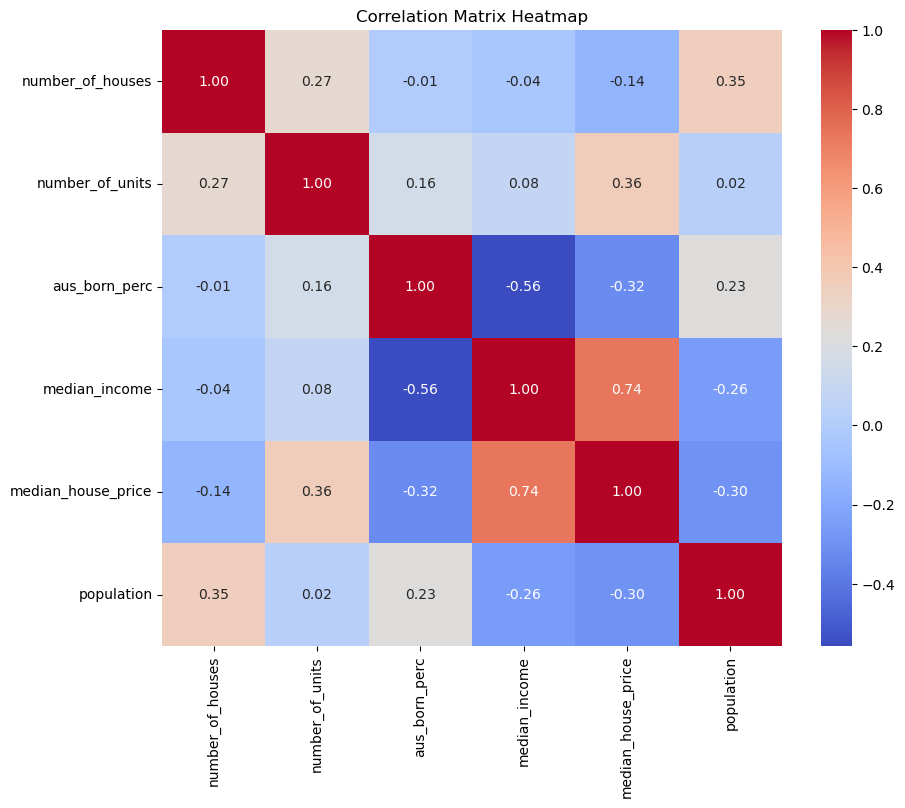

In [15]:
# Create a heatmap after transformation
correlation_plot(suburb_data_transformed)

#### Explanation:

The correlation matrix for the transformed features is calculated.. A heatmap is generated to visualize the correlations, with annotations and a color map to indicate the strength and direction of the correlations.

#### Observation:

After transformation, the correlation between median_house_price and other features has shown notable changes. The weak negative correlation with number_of_houses became slightly more pronounced, while the moderate positive correlation with number_of_units increased. Interestingly, the correlation with aus_born_perc shifted from a weak positive to a weak negative. The strong positive correlation with median_income strengthened slightly, and the weak negative correlation with population became more negative. These adjustments suggest that the transformations addressed some distributional issues, thereby modifying the relationships between median_house_price and the other features.

<div class="alert alert-block alert-info">
    
### **4.2 Normalization**  <a class="anchor" name="norm"></a>

In this section, we will apply various normalization techniques to the transformed features. These techniques include:

1. Max Absolute Normalization: Scales each feature by its maximum absolute value.
2. Min-Max Normalization: Scales features to a fixed range, typically [0, 1].
3. Z-Score Normalization: Standardizes features by removing the mean and scaling to unit variance.
4. Robust Scaling: Scales features using statistics that are robust to outliers (median and interquartile range).
5. L2 Normalization: Scales features to have a unit norm.

Each normalization method has unique strengths and is suitable for different data types and modeling requirements. By normalizing the data, we aim to ensure that all features are appropriately scaled, improving the effectiveness of our predictive models 

1. Max Absolute Normalization:
- Formula:
$$
x^{\prime}=\frac{x}{\left|x_{\max }\right|}
$$
- Explanation: This technique scales each feature by dividing it by its maximum absolute value. It ensures that the values of each feature are in the range $[-1,1]$.
2. Min-Max Normalization:
- Formula:
$$
x^{\prime}=\frac{x-x_{\min }}{x_{\max }-x_{\min }}
$$
- Explanation: This technique scales the features to a fixed range, typically $[0,1]$. The values of each feature are adjusted based on the minimum and maximum values of that feature.
3. Z-Score Normalization (Standardization):
- Formula:
$$
x^{\prime}=\frac{x-\mu}{\sigma}
$$
- Explanation: This technique standardizes the features by removing the mean $(\mu)$ and scaling to unit variance $(\sigma)$. The resulting distribution will have a mean of 0 and a standard deviation of 1 .
4. Robust Scaling:
- Formula:
$$
x^{\prime}=\frac{x-\text { median }}{I Q R}
$$
- Explanation: This technique scales the features using statistics that are robust to outliers, such as the median and the interquartile range (IQR). This ensures that outliers have less influence on the scaling.
5. L2 Normalization:
- Formula:
$$
x^{\prime}=\frac{x}{\sqrt{\sum x^2}}
$$
- Explanation: This technique scales each feature vector to have a unit norm (i.e., the sum of the squares of the vector elements equals 1 ). It is commonly used when the direction of the feature vector is more important than its magnitude.

In [16]:
class Normalization:
    def max_absolute(self, df):
        """
        Apply max absolute normalization technique to the DataFrame.

        Parameters:
        df (DataFrame): The DataFrame containing the data.

        Returns:
        DataFrame: The DataFrame with max absolute normalization applied.
        """
        df_normalized = df.copy()
        for column in df_normalized.columns:
            df_normalized[column] = df_normalized[column] / df_normalized[column].abs().max()
        return df_normalized

    def min_max(self, df):
        """
        Apply min-max normalization technique to the DataFrame.

        Parameters:
        df (DataFrame): The DataFrame containing the data.

        Returns:
        DataFrame: The DataFrame with min-max normalization applied.
        """
        df_normalized = df.copy()
        for column in df_normalized.columns:
            df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())
        return df_normalized

    def z_score(self, df):
        """
        Apply z-score normalization technique to the DataFrame.

        Parameters:
        df (DataFrame): The DataFrame containing the data.

        Returns:
        DataFrame: The DataFrame with z-score normalization applied.
        """
        df_normalized = df.copy()
        for column in df_normalized.columns:
            df_normalized[column] = (df_normalized[column] - df_normalized[column].mean()) / df_normalized[column].std()
        return df_normalized

    def robust_scaler(self, df):
        """
        Apply robust scaling technique to the DataFrame.

        Parameters:
        df (DataFrame): The DataFrame containing the data.

        Returns:
        DataFrame: The DataFrame with robust scaling applied.
        """
        scaler = RobustScaler()
        df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
        return df_normalized

    def l2_normalization(self, df):
        """
        Apply L2 normalization technique to the DataFrame.

        Parameters:
        df (DataFrame): The DataFrame containing the data.

        Returns:
        DataFrame: The DataFrame with L2 normalization applied.
        """
        df_normalized = df.copy()
        for column in df_normalized.columns:
            df_normalized[column] = Normalizer().fit_transform([df_normalized[column]])[0]
        return df_normalized

In [17]:
# Instantiate the Normalization class
normalizer = Normalization()

suburb_data_transformed_numeric = suburb_data_transformed.select_dtypes(include=['int64', 'float64'])
# Apply various normalization techniques
df_max_absolute_normalized = normalizer.max_absolute(suburb_data_transformed_numeric)
df_min_max_normalized = normalizer.min_max(suburb_data_transformed_numeric)
df_z_score_normalized = normalizer.z_score(suburb_data_transformed_numeric)
df_robust_normalized = normalizer.robust_scaler(suburb_data_transformed_numeric)
df_l2_normalized = normalizer.l2_normalization(suburb_data_transformed_numeric)

normalization_methods = ['Max Absolute', 'Min-Max', 'Z-score', 'Robust Scaler', 'L2 Normalization']
normalized_dfs = [df_max_absolute_normalized, df_min_max_normalized, df_z_score_normalized, df_robust_normalized, df_l2_normalized]

# Initialize lists to store the results
mse_list = []

for scale, df in zip(normalization_methods, normalized_dfs):
    # Select features and target variable
    X = df[['number_of_units', 'aus_born_perc', 'median_income', 'population']]
    y = df['median_house_price']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

    # Creating and training the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print(f"Mean Squared Error for {scale} normalization:", mse)

    # Calculating R-squared value
    r2 = model.score(X_test, y_test)
    print(f"R-squared value for {scale} normalization:", r2)

# Determine the best normalization method based on MSE and R-squared value
best_mse_index = mse_list.index(min(mse_list))

print("\nBest Normalization Method Based on MSE:")
print(f"Method: {normalization_methods[best_mse_index]}")
print(f"Mean Squared Error: {mse_list[best_mse_index]}")

Mean Squared Error for Max Absolute normalization: 0.007984293254444599
R-squared value for Max Absolute normalization: 0.7004359941188829
Mean Squared Error for Min-Max normalization: 0.011769835380529224
R-squared value for Min-Max normalization: 0.7004359941188829
Mean Squared Error for Z-score normalization: 0.2967956703623243
R-squared value for Z-score normalization: 0.700435994118883
Mean Squared Error for Robust Scaler normalization: 0.18534764001302384
R-squared value for Robust Scaler normalization: 0.700435994118883
Mean Squared Error for L2 Normalization normalization: 0.000191511766835176
R-squared value for L2 Normalization normalization: 0.7004359941188831

Best Normalization Method Based on MSE:
Method: L2 Normalization
Mean Squared Error: 0.000191511766835176


#### Explanation:

In this section, we applied various normalization techniques to the transformed features of the dataset to evaluate their impact on a linear regression model's performance. The normalization techniques used were:

Max Absolute Normalization
Min-Max Normalization
Z-Score Normalization
Robust Scaling
L2 Normalization

We measured the performance of the linear regression model using Mean Squared Error (MSE) and R-squared (R²) value for each normalization method. The goal was to determine which normalization technique results in the best model performance.

#### Observation:

After applying various normalization techniques to the dataset and evaluating the linear regression model's performance, we found that L2 Normalization resulted in the best model performance, with the lowest Mean Squared Error (MSE) and a high R-squared value. This indicates that L2 Normalization is the most effective technique for this dataset in terms of improving the model's predictive accuracy.

<div class="alert alert-block alert-success">
    
## **V. Conclusion**  <a class="anchor" name="conclu"></a>

In this assignment, we explored the relationship between various features and median house prices in suburban areas through a comprehensive process of data preprocessing, exploratory data analysis, transformation, and normalization. Initially, we cleaned the dataset to remove special characters and convert columns to appropriate data types. Descriptive statistics revealed significant variability across features, prompting further investigation through histograms, violin plots, and skewness calculations, which indicated the need for transformation due to right-skewed distributions. We applied several transformations, including logarithmic, square root, squaring, cubing, cube root, reciprocal, Box-Cox, and Yeo-Johnson, to improve feature distributions and correlations with median house prices. Subsequently, we normalized the data using techniques such as max absolute, min-max, z-score, robust scaler, and L2 normalization. We then trained linear regression models, evaluating their performance based on mean squared error (MSE) and R-squared values. The results highlighted that L2 normalization provided the best performance, yeilding lowest MSE score.

<div class="alert alert-block alert-success">
    
## **Refernce**  <a class="anchor" name="Ref"></a>

- Harris, Charles R., et al. "Array programming with NumPy." Nature 585.7825 (2020): 357-362. NumPy Documentation.
- Pedregosa, Fabian, et al. "Scikit-learn: Machine learning in Python." the Journal of machine Learning research 12 (2011): 2825-2830.
- Waskom, Michael L. "Seaborn: statistical data visualization." Journal of Open Source Software 6.60 (2021): 3021.
- Virtanen, Pauli, et al. "SciPy 1.0: fundamental algorithms for scientific computing in Python." Nature methods 17.3 (2020): 261-272.